In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
df=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Data_Science\\Project 2\\teleCust1000t.csv")

In [5]:
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

In [6]:
# Imagine a telecommunications provider has segmented its customer base by service usage patterns, 
#categorizing the customers into four groups. If demographic data can be used to predict group membership, 
#the company can customize offers for individual prospective customers. It is a classification problem. That is, 
#given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.
#The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.
#The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service
# Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

# The target field, called custcat, has four possible values that correspond to the four customer groups, as follows:
#1- Basic Service 
#2- E-Service 
#3- Plus Service 
#4- Total Service

In [7]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002F21B01DBA8>]],
      dtype=object)

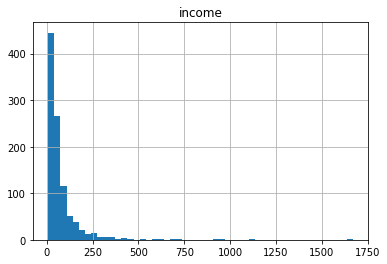

In [8]:
df.hist(column='income', bins=50)

In [9]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [10]:
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]
    

In [11]:
y=df[['custcat']]

In [12]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn=KNeighborsClassifier(n_neighbors=4)

In [16]:
knn.fit(X_train,y_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [17]:
pred=knn.predict(X_test)

In [18]:
pred[0:10]

array([1, 1, 2, 1, 1, 4, 1, 3, 3, 3], dtype=int64)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, pred))

Train set Accuracy:  0.54625
Test set Accuracy:  0.365


In [22]:
knn.score(X,y)

0.51

In [23]:
knn.predict([[3,23,45,0,25,100,3,25,0,1,5]])

array([3], dtype=int64)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(y_test,pred))

[[31  7 15 10]
 [10  8 14  5]
 [16  6 24  6]
 [11 16 11 10]]


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.46      0.49      0.47        63
           2       0.22      0.22      0.22        37
           3       0.38      0.46      0.41        52
           4       0.32      0.21      0.25        48

   micro avg       0.36      0.36      0.36       200
   macro avg       0.34      0.34      0.34       200
weighted avg       0.36      0.36      0.36       200



In [31]:
knn.predict([[3,23,50,0,25,120,3,25,0,1,2]])

array([3], dtype=int64)

In [ ]:
#  RESULT: Means telecommunication company will provide Plus service to its customer.